In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
import torch.utils.data as data 


In [2]:
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(42)
data = nn.Parameter(torch.randn(2, 2), requires_grad=True)
data

Parameter containing:
tensor([[0.3367, 0.1288],
        [0.2345, 0.2303]], requires_grad=True)

In [4]:
torch.manual_seed(42)

In [5]:
nn.Parameter(torch.randn(2, 2), requires_grad=True)

Parameter containing:
tensor([[0.3367, 0.1288],
        [0.2345, 0.2303]], requires_grad=True)

In [6]:
m,c=0.3,0.4
x=torch.randn(100,1).squeeze(1)
y=m*x+c

In [7]:
x,y

(tensor([ 1.7878, -0.4780, -0.2429, -0.9342, -0.2483, -1.2082, -0.4777,  0.5201,
         -1.5673, -0.2394,  2.3228, -0.9634,  2.0024,  0.4664,  1.5730, -0.9228,
          0.3559, -0.6866, -0.4934,  0.2415, -1.1109,  0.0915, -2.3169, -0.2168,
         -0.3097, -0.3957,  0.8034, -0.6216, -0.5920, -0.0631, -0.8286,  0.3309,
          0.0349,  0.3211,  1.5736, -0.8455,  1.3123,  0.6872, -1.0892, -0.3553,
         -1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345, -1.3864, -1.2862,
         -0.8371, -0.9224,  1.8113,  0.1606,  0.3672,  0.1754,  1.3852, -0.4459,
         -1.2024,  0.7078, -1.0759,  0.5357,  1.1754,  0.5612, -0.4527, -0.7718,
          0.1453,  0.2311,  0.0087, -0.1423,  0.1971, -1.1441,  0.3383,  1.6992,
          2.8140,  0.3598, -0.0898,  0.4584, -0.5644,  1.0563, -1.4692,  1.4332,
          0.7281, -0.7106, -0.6021,  0.9604, -0.3165,  0.5886, -0.8905,  0.4098,
         -1.4570, -0.1023, -0.5992,  0.4771, -0.1693,  0.2332,  4.0356,  1.2795,
         -0.0127,  0.2408,  

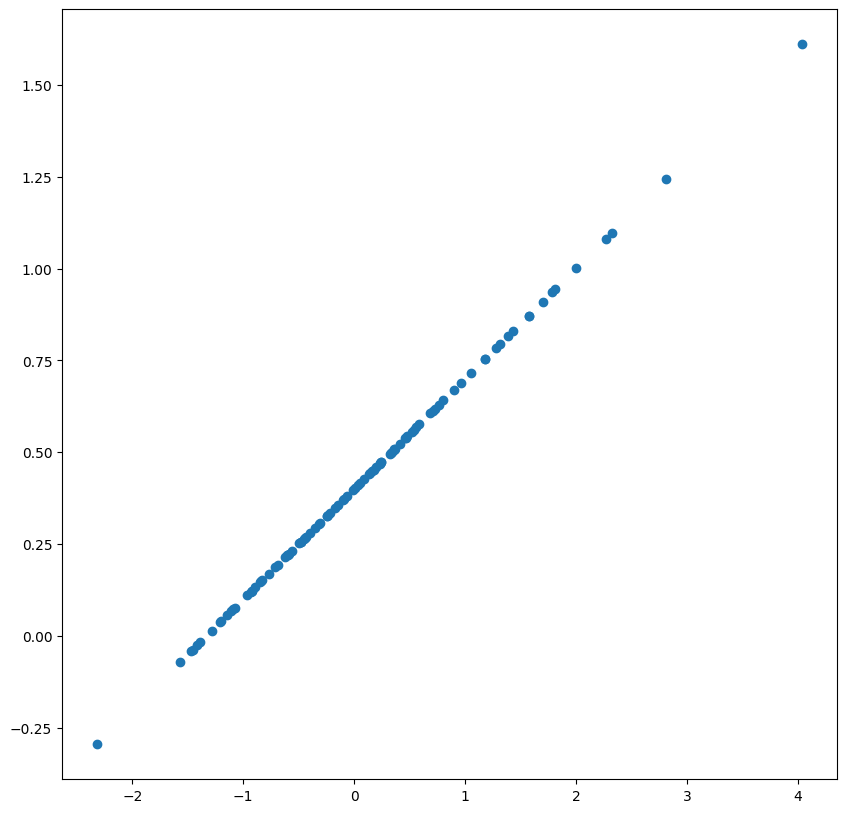

In [8]:
figure=plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

In [11]:
model=LinearRegression()
loss=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
model

c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [12]:
for i in range(1000):
    optimizer.zero_grad()
    pred=model(x_train.unsqueeze(1))
    l=loss(pred,y_train.unsqueeze(1))
    l.backward()
    optimizer.step()
    model.eval()
    with torch.no_grad():
        pred_test=model(x_test.unsqueeze(1))
        l_test=loss(pred_test,y_test.unsqueeze(1))
    if i%100==0:
        print(f"Epoch {i} train loss {l} test loss {l_test}")

Epoch 0 train loss 2.0673446655273438 test loss 2.5946145057678223
Epoch 100 train loss 0.027928883209824562 test loss 0.034775152802467346
Epoch 200 train loss 0.00038427437539212406 test loss 0.0004724704776890576
Epoch 300 train loss 5.412103746493813e-06 test loss 6.532514817081392e-06
Epoch 400 train loss 7.83848719265734e-08 test loss 9.2269338836104e-08
Epoch 500 train loss 1.1721835724287644e-09 test loss 1.3370113904898062e-09
Epoch 600 train loss 1.8760295400488403e-11 test loss 2.0865276520454223e-11
Epoch 700 train loss 9.213851469985768e-13 test loss 1.2096879487694112e-12
Epoch 800 train loss 9.213851469985768e-13 test loss 1.2096879487694112e-12
Epoch 900 train loss 9.213851469985768e-13 test loss 1.2096879487694112e-12


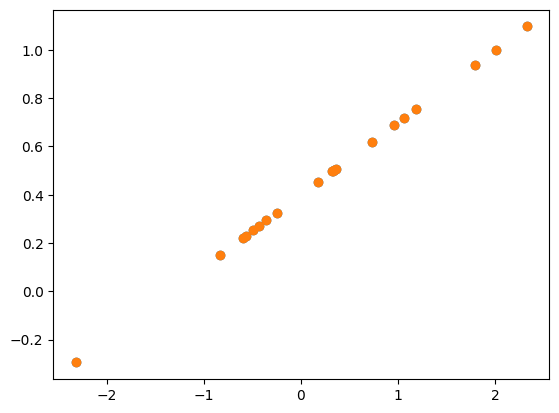

In [13]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,model(x_test.unsqueeze(1)).detach().numpy())
plt.show()

In [14]:
torch.__version__

'2.1.0+cu118'

In [15]:
 print('hi')

hi


In [16]:
import sklearn.datasets 
data=sklearn.datasets.make_circles(n_samples=1000,noise=0.05,factor=0.5)
x,y=data
x.shape,y.shape
x_tensor=torch.tensor(x).float()
y_tensor=torch.tensor(y).float()
x_train,x_test,y_train,y_test=train_test_split(x_tensor,y_tensor,test_size=0.2,random_state=42)
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(2,16)
        self.linear2=nn.Linear(16,8)
        self.linear3=nn.Linear(8,4)
        self.linear4=nn.Linear(4,1)
    def forward(self,x):
        return self.linear4(self.linear3(self.linear2(self.linear1(x)) ))

model=ClassificationModel()
model
optimizer=optim.Adam(model.parameters(),lr=0.03)
loss=nn.BCEWithLogitsLoss()
for i in range(1000):
    optimizer.zero_grad()
    pred=model(x_train)
    l=loss(pred,y_train.unsqueeze(1))
    l.backward()
    optimizer.step()
    with torch.no_grad():
        pred_test=model(x_test)
        l_test=loss(pred_test,y_test.unsqueeze(1))
        if i%100==0:
            print(f" loss {l} test loss {l_test}")

            


 loss 0.6982030272483826 test loss 0.7009384632110596
 loss 0.6927274465560913 test loss 0.6975632309913635
 loss 0.6927273273468018 test loss 0.6975685954093933
 loss 0.6927273273468018 test loss 0.6975685358047485
 loss 0.6927273273468018 test loss 0.6975685358047485
 loss 0.6927273273468018 test loss 0.6975685358047485
 loss 0.6927273273468018 test loss 0.6975685358047485
 loss 0.6927273273468018 test loss 0.6975685358047485
 loss 0.6927273273468018 test loss 0.6975685358047485
 loss 0.6927273273468018 test loss 0.6975685358047485


In [37]:
print(model.linear2)
list(model.linear2.parameters())



Linear(in_features=16, out_features=8, bias=True)


[Parameter containing:
 tensor([[-0.1423, -0.1250, -0.3016,  0.0961,  0.0846, -0.1156, -0.0046,  0.1300,
          -0.0013, -0.0380,  0.1859,  0.0777,  0.0396,  0.1509, -0.0620,  0.1141],
         [ 0.1324, -0.0209,  0.1021,  0.1266, -0.0127,  0.0233,  0.0389,  0.1163,
           0.1211,  0.0595, -0.3251, -0.0294,  0.2440,  0.2933,  0.1427, -0.1805],
         [-0.2184, -0.1300, -0.0181, -0.0510,  0.1912,  0.0592, -0.1790, -0.0161,
           0.0475,  0.2095,  0.0129,  0.0384,  0.1506, -0.0097, -0.1213,  0.2362],
         [ 0.0284,  0.0867, -0.2294, -0.0125,  0.3022,  0.1081, -0.0941, -0.0343,
          -0.0536,  0.0973, -0.0698,  0.3571,  0.2614,  0.1760,  0.2121, -0.1781],
         [-0.2152, -0.1098,  0.1104, -0.5107, -0.1675, -0.1258, -0.0605,  0.1969,
          -0.0199,  0.1369,  0.0323,  0.2597, -0.0543, -0.0493, -0.0667,  0.1073],
         [-0.0282, -0.2919,  0.2063, -0.0669,  0.2064,  0.0489,  0.2195, -0.3057,
           0.1297, -0.0968,  0.1000,  0.1631, -0.0413, -0.3002, -0.120

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn.datasets
from sklearn.model_selection import train_test_split

# Generate dataset
data = sklearn.datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)
x, y = data
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float()

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 16)
        self.bn1 = nn.BatchNorm1d(16)  # Batch Normalization
        self.linear2 = nn.Linear(16, 8)
        self.bn2 = nn.BatchNorm1d(8)
        self.linear3 = nn.Linear(8, 4)
        self.bn3 = nn.BatchNorm1d(4)
        self.linear4 = nn.Linear(4, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout to prevent overfitting
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.linear1(x)))
        x = torch.relu(self.bn2(self.linear2(x)))
        x = torch.relu(self.bn3(self.linear3(x)))
        x = self.linear4(x)  # No activation, since BCEWithLogitsLoss expects raw logits
        return x

# Create model, optimizer, and loss function
model1 = ClassificationModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Reduced learning rate
loss_fn = nn.BCEWithLogitsLoss()

# Training loop
for i in range(1000):
    model.train()
    optimizer.zero_grad()
    
    pred = model(x_train)
    l = loss_fn(pred, y_train.unsqueeze(1))
    l.backward()
    optimizer.step()
    
    # Evaluate on test set
    if i % 100 == 0:
        model.eval()
        with torch.no_grad():
            pred_test = model(x_test)
            l_test = loss_fn(pred_test, y_test.unsqueeze(1))
            print(f"Iteration {i}: Train Loss = {l:.4f}, Test Loss = {l_test:.4f}")

# Check model performance
model.eval()
with torch.no_grad():
    test_preds = torch.sigmoid(model(x_test))  # Convert logits to probabilities
    test_preds = (test_preds > 0.5).float()  # Convert to binary predictions
    accuracy = (test_preds.squeeze() == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")


Iteration 0: Train Loss = 0.6938, Test Loss = 0.6927
Iteration 100: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 200: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 300: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 400: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 500: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 600: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 700: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 800: Train Loss = 0.6930, Test Loss = 0.6947
Iteration 900: Train Loss = 0.6930, Test Loss = 0.6946
Test Accuracy: 0.5050


In [18]:
from pathlib import Path 
import requests

In [19]:
import requests
from pathlib import Path

file_name = 'helper_functions.py'  # Correct file name

if Path(file_name).is_file():
    print('exists')
else:
    print('hello')
    url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'
    
    response = requests.get(url)
    
    if response.status_code == 200:  # Check if the request was successful
        with open(file_name, 'wb') as f:
            f.write(response.content)
        print(f"{file_name} downloaded successfully.")
    else:
        print(f"Failed to download {file_name}, status code: {response.status_code}")



exists


In [20]:
from helper_functions import plot_decision_boundary

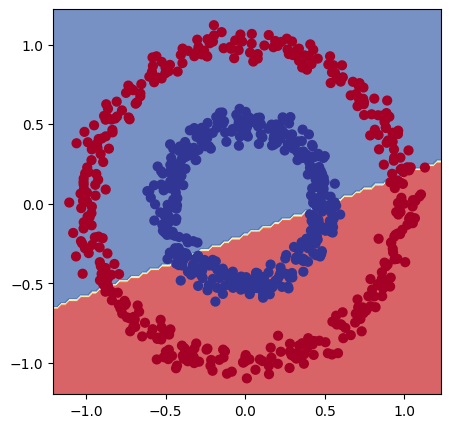

In [21]:
figure=plt.figure(figsize=(5,5))
plot_decision_boundary(model,x_train,y_train)